# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import date as dt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

In [54]:
#Remove any duplicate cities from the list
cities  = list(set(cities))
len(cities)

#split the list in 50s
def divide_list(_list, list_length):
    for i in range(0, len(cities), 50):
         yield cities[i:i+list_length] 

city_groups = list(divide_list(cities, 50)) 
url = f"http://api.openweathermap.org/data/2.5/weather?q=Cumming&appid={weather_api_key}&units=imperial"
json_data = requests.get(url).json()
pprint(json_data)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 34.2073, 'lon': -84.1402},
 'dt': 1634665855,
 'id': 4190396,
 'main': {'feels_like': 70.2,
          'humidity': 45,
          'pressure': 1025,
          'temp': 71.26,
          'temp_max': 75.06,
          'temp_min': 67.1},
 'name': 'Cumming',
 'sys': {'country': 'US',
         'id': 2003300,
         'sunrise': 1634643907,
         'sunset': 1634684250,
         'type': 2},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 201, 'gust': 4.38, 'speed': 3.11}}


In [75]:
#Create the base url for the api call
url = f"http://api.openweathermap.org/data/2.5/weather"
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
final_city_list = []


# loop through each set of cities 
print("Beginning data Retrieval")
print("-" * 30)

for set_number, a_city_list in enumerate(city_groups):
   
    #loop through a list of cities
    for index, a_city in enumerate(a_city_list):
        param = f"?q={a_city}&appid={weather_api_key}&units=imperial"
        request_url = url + param
        print(f"Processing Record {index + 1} of Set {set_number + 1} | {a_city}")
        try:
            json_data = requests.get(request_url).json()
            #pprint(request_url)
            lat.append(json_data["coord"]["lat"]) 
            lng.append(json_data["coord"]["lon"])
            max_temp.append(json_data["main"]["temp_max"])
            humidity.append(json_data["main"]["humidity"])
            cloudiness.append(json_data["clouds"]["all"])
            date.append(json_data["dt"])
            country.append(json_data["sys"]["country"])
            wind_speed.append(json_data["wind"]["speed"])
            final_city_list.append(a_city) #add the city in the end to ensure clean list of cities
            
        except Exception as e:
            print(f"City {a_city} not found. Skipping...")
   
#Create a dataframe with all the city data
city_data_df = pd.DataFrame({"City": final_city_list, 
                "Lat": lat, "Lng": lng,
                "Max temp": max_temp,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": wind_speed,
                "Country": country,
                "Date": date})


Beginning data Retrieval
------------------------------
Processing Record 1 of Set 1 | mehamn
Processing Record 2 of Set 1 | nikki
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | longlac
City longlac not found. Skipping...
Processing Record 6 of Set 1 | asfi
Processing Record 7 of Set 1 | kirakira
Processing Record 8 of Set 1 | palmer
Processing Record 9 of Set 1 | karratha
Processing Record 10 of Set 1 | mogadishu
Processing Record 11 of Set 1 | nichinan
Processing Record 12 of Set 1 | havelock
Processing Record 13 of Set 1 | sabha
Processing Record 14 of Set 1 | lang son
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | hobyo
Processing Record 17 of Set 1 | madhoganj
Processing Record 18 of Set 1 | collie
Processing Record 19 of Set 1 | victoria point
Processing Record 20 of Set 1 | mizan teferi
Processing Record 21 of Set 1 | gat
Processing Record 22 of Set 1 | pisco
Processing Record 23 of Set 1 

Processing Record 38 of Set 4 | tazovskiy
Processing Record 39 of Set 4 | ostrovnoy
Processing Record 40 of Set 4 | huicheng
Processing Record 41 of Set 4 | anadyr
Processing Record 42 of Set 4 | swan hill
Processing Record 43 of Set 4 | port washington
Processing Record 44 of Set 4 | north bend
Processing Record 45 of Set 4 | new norfolk
Processing Record 46 of Set 4 | mitsamiouli
Processing Record 47 of Set 4 | nioki
Processing Record 48 of Set 4 | dingle
Processing Record 49 of Set 4 | georgetown
Processing Record 50 of Set 4 | vaini
Processing Record 1 of Set 5 | dong hoi
Processing Record 2 of Set 5 | mazamet
Processing Record 3 of Set 5 | constitucion
Processing Record 4 of Set 5 | labuhan
Processing Record 5 of Set 5 | anloga
Processing Record 6 of Set 5 | nador
Processing Record 7 of Set 5 | kamaishi
Processing Record 8 of Set 5 | kushiro
Processing Record 9 of Set 5 | durazno
Processing Record 10 of Set 5 | narsaq
Processing Record 11 of Set 5 | phalaborwa
Processing Record 12

Processing Record 30 of Set 8 | bodden town
Processing Record 31 of Set 8 | borogontsy
Processing Record 32 of Set 8 | vanimo
Processing Record 33 of Set 8 | husavik
Processing Record 34 of Set 8 | jutai
Processing Record 35 of Set 8 | chhatapur
Processing Record 36 of Set 8 | searcy
Processing Record 37 of Set 8 | mys shmidta
City mys shmidta not found. Skipping...
Processing Record 38 of Set 8 | alcala la real
Processing Record 39 of Set 8 | dwarka
Processing Record 40 of Set 8 | akyab
Processing Record 41 of Set 8 | damietta
Processing Record 42 of Set 8 | saleaula
City saleaula not found. Skipping...
Processing Record 43 of Set 8 | zeya
Processing Record 44 of Set 8 | mandurah
Processing Record 45 of Set 8 | mayo
Processing Record 46 of Set 8 | kutum
Processing Record 47 of Set 8 | mar del plata
Processing Record 48 of Set 8 | severo-kurilsk
Processing Record 49 of Set 8 | tarakan
Processing Record 50 of Set 8 | busselton
Processing Record 1 of Set 9 | kaeo
Processing Record 2 of S

Processing Record 14 of Set 12 | cabo san lucas
Processing Record 15 of Set 12 | matagami
Processing Record 16 of Set 12 | san severo
Processing Record 17 of Set 12 | chateau-gontier
Processing Record 18 of Set 12 | alamosa
Processing Record 19 of Set 12 | izazi
Processing Record 20 of Set 12 | milkovo
Processing Record 21 of Set 12 | puerto baquerizo moreno
Processing Record 22 of Set 12 | kavaratti
Processing Record 23 of Set 12 | bargal
City bargal not found. Skipping...
Processing Record 24 of Set 12 | sinkat
City sinkat not found. Skipping...
Processing Record 25 of Set 12 | coshocton
Processing Record 26 of Set 12 | hasaki
Processing Record 27 of Set 12 | impfondo
Processing Record 28 of Set 12 | linhares
Processing Record 29 of Set 12 | staryy nadym
Processing Record 30 of Set 12 | pangody
Processing Record 31 of Set 12 | necochea
Processing Record 32 of Set 12 | krasnoselkup
Processing Record 33 of Set 12 | malinovoye ozero
Processing Record 34 of Set 12 | mombetsu
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [87]:
#Export the city data into a .csv.
city_data_df.to_csv("output/city_data.csv")
#Display the DataFrame
city_data_df.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mehamn,71.0357,27.8492,30.11,86,40,6.91,NO,1634668289
1,nikki,9.9401,3.2108,75.25,86,63,4.70,BJ,1634668364
2,rikitea,-23.1203,-134.9692,74.86,71,5,21.25,PF,1634668135
3,saint george,37.1041,-113.5841,63.54,39,1,3.00,US,1634668135
4,asfi,32.2994,-9.2372,70.84,85,27,6.80,MA,1634668136


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


In [79]:
city_data_df.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,17.771418,17.761502,63.198428,69.483592,58.423143,8.224750,1.634668e+09
std,32.996395,91.036836,19.326310,21.081921,40.084110,5.866761,2.166998e+02
min,-54.800000,-179.166700,-13.850000,8.000000,0.000000,0.000000,1.634668e+09
25%,-9.407900,-60.329750,51.010000,56.000000,17.500000,4.000000,1.634668e+09
50%,21.444700,21.492500,69.210000,74.000000,75.000000,6.910000,1.634668e+09
75%,43.148050,95.044050,77.670000,86.000000,100.000000,10.870000,1.634669e+09
max,78.218600,179.316700,102.250000,100.000000,100.000000,37.760000,1.634669e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [84]:
#Check for cities with humidity > 100%
city_data_df.loc[city_data_df["Humidity"] >100]


,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

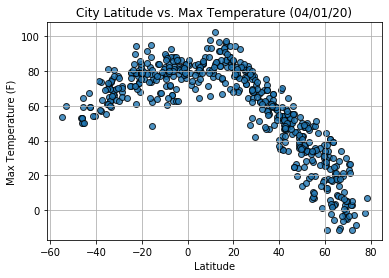

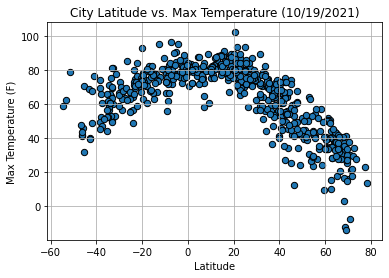

In [122]:
city_data_df.plot(kind="scatter",x="Lat",y="Max temp", s=40, edgecolor="black")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
today = dt.today().strftime("%m/%d/%Y")
plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.savefig("output/temp_scatter.png")


## Latitude vs. Humidity Plot

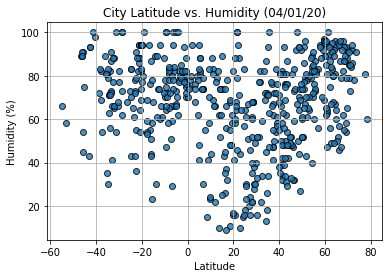

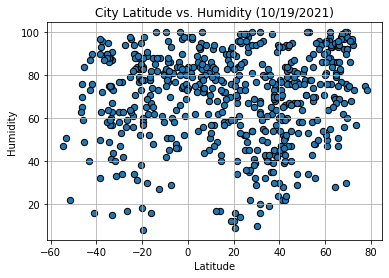

In [123]:
city_data_df.plot(kind="scatter",x="Lat",y="Humidity", s=40, edgecolor="black")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()
plt.title(f"City Latitude vs. Humidity ({today})")
plt.savefig("output/humidity_scatter.png")

## Latitude vs. Cloudiness Plot

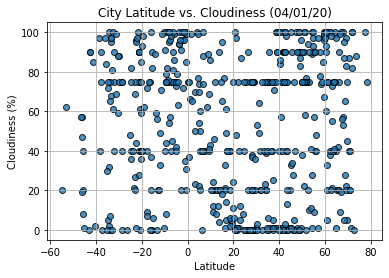

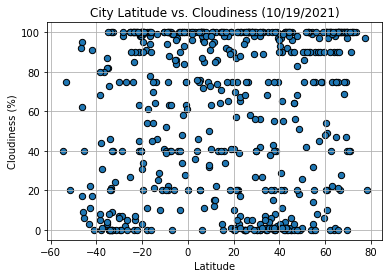

In [124]:
city_data_df.plot(kind="scatter",x="Lat",y="Cloudiness", s=40, edgecolor="black")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.savefig("output/cloudiness_scatter.png")
plt.grid()

## Latitude vs. Wind Speed Plot

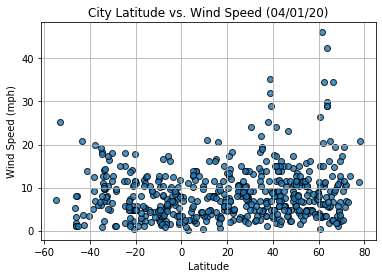

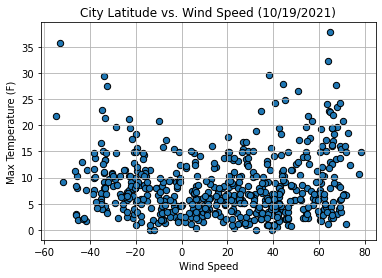

In [125]:
city_data_df.plot(kind="scatter",x="Lat",y="Wind Speed", s=40, edgecolor="black")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Wind Speed")
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.savefig("output/wind_speed_scatter.png")


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


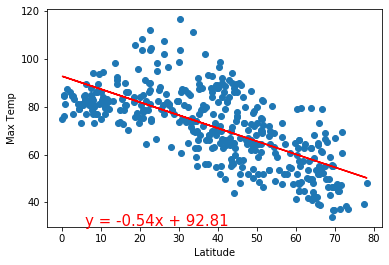

The r-value is: -0.8578370860227793


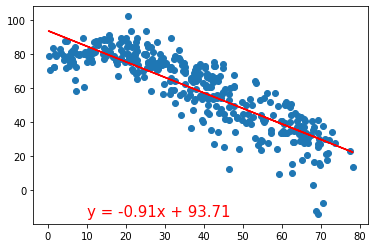

In [190]:

#Filter the cities dataframe for citites in the northern hemisphere
northern_df = city_data_df.loc[city_data_df["Lat"] > 0]

#Determine the slope and the y-intercept using the linregress function
model = linregress(northern_df["Lat"], northern_df["Max temp"])
slope = model[0]
intercept = model[1]
rvalue = model[2]

#Calculate the y-values using y = mx+b
y_values = (slope * northern_df["Lat"]) + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}" #line equation formatted

#Plot the scatter chart and the line of best fit
plt.scatter(northern_df["Lat"], northern_df["Max temp"])
plt.plot(northern_df["Lat"], y_values, "r-")
plt.annotate(line_eq, (10,-15), color="red", fontsize=15)
print(f"The r-value is: {rvalue}")
plt.savefig("output/northern_maxtemp_Lat.png")
plt.show()




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


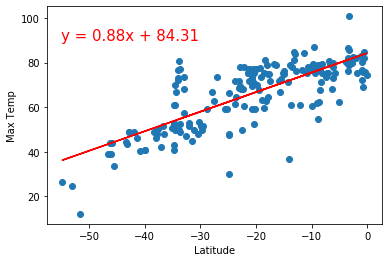

The r-value is: 0.6931365128660923


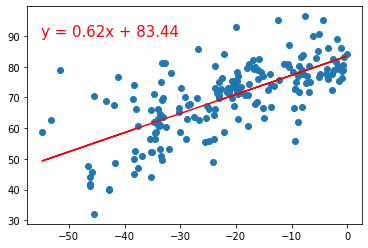

In [189]:
#Filter the cities dataframe for citites in the southern hemisphere
southern_df = city_data_df.loc[city_data_df["Lat"] < 0]

#Determine the slope and the y-intercept using the linregress function
model = linregress(southern_df["Lat"], southern_df["Max temp"])
slope = model[0]
intercept = model[1]
rvalue = model[2]

#Calculate the y-values using y = mx+b
y_values = (slope * southern_df["Lat"]) + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}" #line equation formatted

#Plot the scatter chart and the line of best fit
plt.scatter(southern_df["Lat"], southern_df["Max temp"])
plt.plot(southern_df["Lat"], y_values, "r-")
plt.annotate(line_eq, (-55,90), color="red", fontsize=15)
print(f"The r-value is: {rvalue}")
plt.savefig("output/southern_maxtemp_Lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


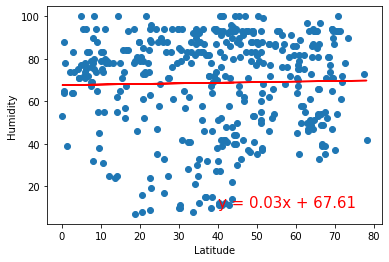

The r-value is: 0.09314220063436905


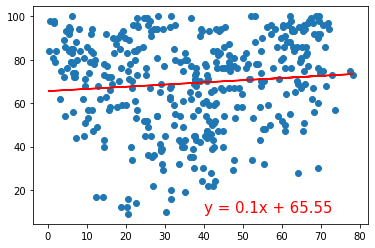

In [188]:

#Filter the cities dataframe for citites in the northern hemisphere
northern_df = city_data_df.loc[city_data_df["Lat"] > 0]

#Determine the slope and the y-intercept using the linregress function
model = linregress(northern_df["Lat"], northern_df["Humidity"])
slope = model[0]
intercept = model[1]
rvalue = model[2]

#Calculate the y-values using y = mx+b
y_values = (slope * northern_df["Lat"]) + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}" #line equation formatted

#Plot the scatter chart and the line of best fit
plt.scatter(northern_df["Lat"], northern_df["Humidity"])
plt.plot(northern_df["Lat"], y_values, "r-")
plt.annotate(line_eq, (40,10), color="red", fontsize=15)
print(f"The r-value is: {rvalue}")
plt.savefig("output/northern_humidity_Lat.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


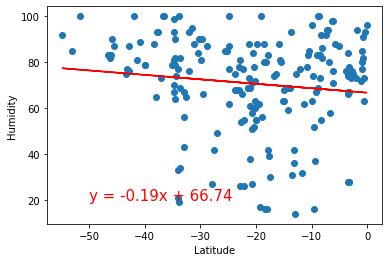

The r-value is: 0.1634824892197256


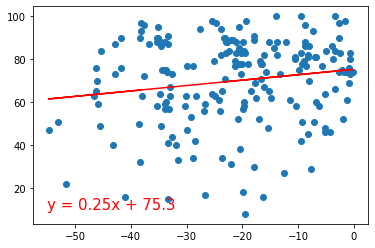

In [187]:
#Filter the cities dataframe for citites in the southern hemisphere
southern_df = city_data_df.loc[city_data_df["Lat"] < 0]

#Determine the slope and the y-intercept using the linregress function
model = linregress(southern_df["Lat"], southern_df["Humidity"])
slope = model[0]
intercept = model[1]
rvalue = model[2]

#Calculate the y-values using y = mx+b
y_values = (slope * southern_df["Lat"]) + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}" #line equation formatted

#Plot the scatter chart and the line of best fit
plt.scatter(southern_df["Lat"], southern_df["Humidity"])
plt.plot(southern_df["Lat"], y_values, "r-")
plt.annotate(line_eq, (-55,10), color="red", fontsize=15)
print(f"The r-value is: {rvalue}")
plt.savefig("output/southern_humidity_Lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


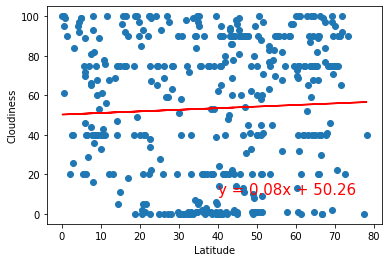

The r-value is: 0.005191224952006178


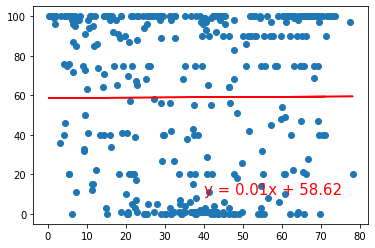

In [186]:
#Filter the cities dataframe for citites in the northern hemisphere
northern_df = city_data_df.loc[city_data_df["Lat"] > 0]

#Determine the slope and the y-intercept using the linregress function
model = linregress(northern_df["Lat"], northern_df["Cloudiness"])
slope = model[0]
intercept = model[1]
rvalue = model[2]

#Calculate the y-values using y = mx+b
y_values = (slope * northern_df["Lat"]) + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}" #line equation formatted

#Plot the scatter chart and the line of best fit
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"])
plt.plot(northern_df["Lat"], y_values, "r-")
plt.annotate(line_eq, (40,10), color="red", fontsize=15)
print(f"The r-value is: {rvalue}")
plt.savefig("output/northern_cloud_Lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


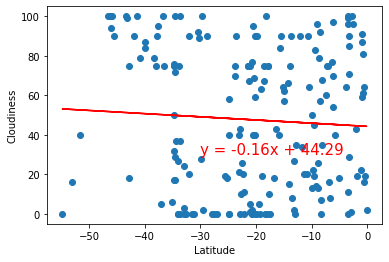

The r-value is: 0.32194311511226525


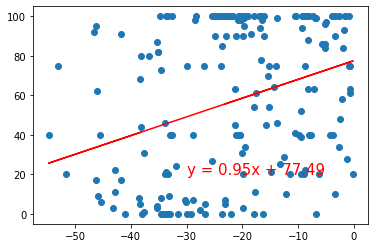

In [182]:
#Filter the cities dataframe for citites in the southern hemisphere
southern_df = city_data_df.loc[city_data_df["Lat"] < 0]

#Determine the slope and the y-intercept using the linregress function
model = linregress(southern_df["Lat"], southern_df["Cloudiness"])
slope = model[0]
intercept = model[1]
rvalue = model[2]

#Calculate the y-values using y = mx+b
y_values = (slope * southern_df["Lat"]) + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}" #line equation formatted

#Plot the scatter chart and the line of best fit
plt.scatter(southern_df["Lat"], southern_df["Cloudiness"])
plt.plot(southern_df["Lat"], y_values, "r-")
plt.annotate(line_eq, (-30,20), color="red", fontsize=15)
print(f"The r-value is: {rvalue}")
plt.savefig("output/southern_cloud_Lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


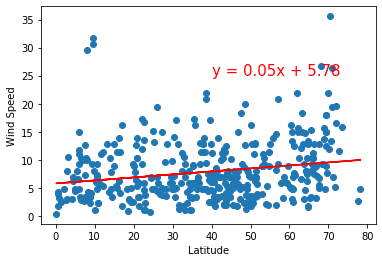

The r-value is: 0.2863711918129562


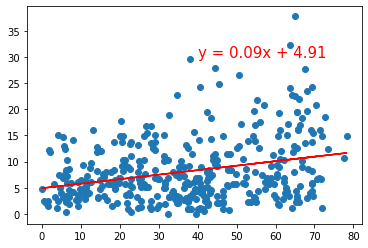

In [185]:
#Filter the cities dataframe for citites in the northern hemisphere
northern_df = city_data_df.loc[city_data_df["Lat"] > 0]

#Determine the slope and the y-intercept using the linregress function
model = linregress(northern_df["Lat"], northern_df["Wind Speed"])
slope = model[0]
intercept = model[1]
rvalue = model[2]

#Calculate the y-values using y = mx+b
y_values = (slope * northern_df["Lat"]) + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}" #line equation formatted

#Plot the scatter chart and the line of best fit
plt.scatter(northern_df["Lat"], northern_df["Wind Speed"])
plt.plot(northern_df["Lat"], y_values, "r-")
plt.annotate(line_eq, (40,30), color="red", fontsize=15)
print(f"The r-value is: {rvalue}")
plt.savefig("output/northern_WS_Lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


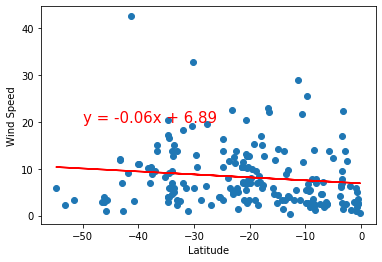

The r-value is: -0.26586608730240446


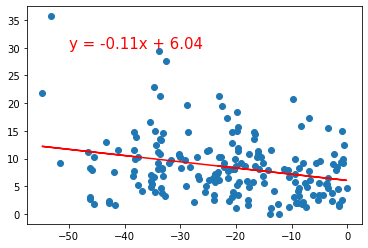

In [180]:
#Filter the cities dataframe for citites in the southern hemisphere
southern_df = city_data_df.loc[city_data_df["Lat"] < 0]

#Determine the slope and the y-intercept using the linregress function
model = linregress(southern_df["Lat"], southern_df["Wind Speed"])
slope = model[0]
intercept = model[1]
rvalue = model[2]

#Calculate the y-values using y = mx+b
y_values = (slope * southern_df["Lat"]) + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}" #line equation formatted

#Plot the scatter chart and the line of best fit
plt.scatter(southern_df["Lat"], southern_df["Wind Speed"])
plt.plot(southern_df["Lat"], y_values, "r-")
plt.annotate(line_eq, (-50,30), color="red", fontsize=15)
print(f"The r-value is: {rvalue}")
plt.savefig("output/southern_WS_Lat.png")
plt.show()
